***
## <span style="color:blue">датасет data_2d:</span>
***

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

1. Завантаження та попередній аналіз структури датасету:

In [78]:
df_2d = pd.read_csv("sources/data_2d.csv")

df_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   0.000000000000000000e+00   199 non-null    float64
 1   -7.687164597386728637e-01  199 non-null    float64
 2   4.608603078297135447e-01   199 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [79]:
display(df_2d)

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


2. Додамо назви до колонок для зручності роботи

In [80]:
df_2d.columns = ["class", "X2", "X3"]
display(df_2d)

,class,X2,X3
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


3. Візуалізуємо дані з маркуванням заданих класів

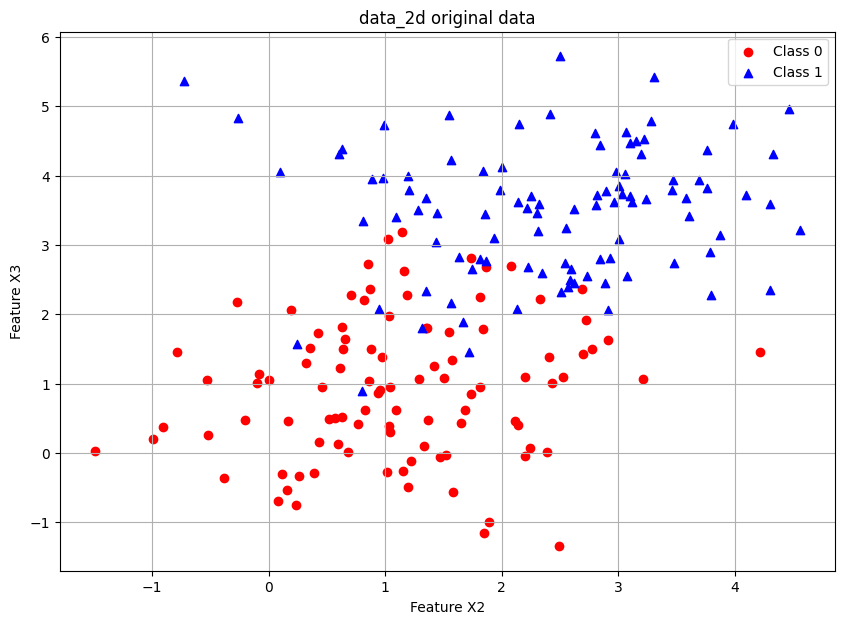

In [90]:
plt.figure(figsize=(10, 7))

plt.scatter(
    df_2d[df_2d["class"] == 0]["X2"],
    df_2d[df_2d["class"] == 0]["X3"],
    color="red",
    label="Class 0",
)
plt.scatter(
    df_2d[df_2d["class"] == 1]["X2"],
    df_2d[df_2d["class"] == 1]["X3"],
    color="blue",
    marker="^",
    label="Class 1",
)

plt.xlabel("Feature X2")
plt.ylabel("Feature X3")
plt.title("data_2d original data")
plt.legend()
plt.grid(True)
plt.show()

4. Код для методу ліктя та кластеризації для даних data_2d

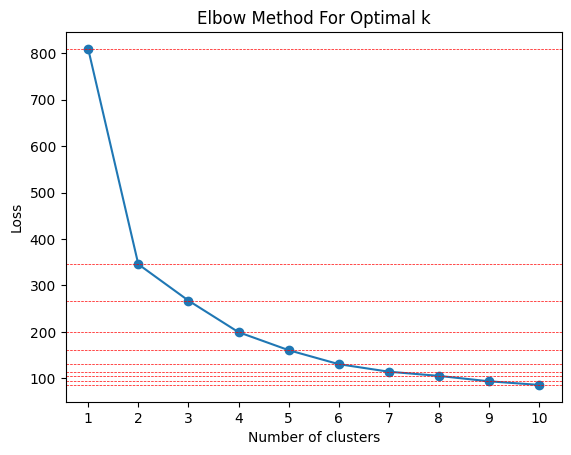

[809.2157980450891, 345.76431862173735, 267.5427359832115, 199.5713290667057, 160.79863090065993, 130.68834355403146, 114.43207689817254, 105.39540860269443, 93.77223756455749, 85.97369572936512]


In [82]:
X_2d = df_2d[["X2", "X3"]]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init="auto", random_state=42)
    kmeans.fit(X_2d)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o", linestyle="-")
for loss in wcss:
    plt.axhline(y=loss, color="red", linestyle="--", linewidth=0.5)


plt.xticks(np.arange(1, 11, step=1))
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.title("Elbow Method For Optimal k")
plt.show()

print(wcss)

Хоча дані розділені на 2 класи, на графіках видно, що розділення на 3 або 4 класи також може бути доцільним, оскільки значення Loss відчутно зменшується при збільшені к-ті кластерів. 

5. Cтворимо візуалізацію для 3 та 4 кластерів і порівняємо результати

Cluster sizes for 3 clusters:
0    62
1    66
2    71
Name: count, dtype: int64
Cluster sizes for 4 clusters:
0    55
1    31
2    71
3    42
Name: count, dtype: int64


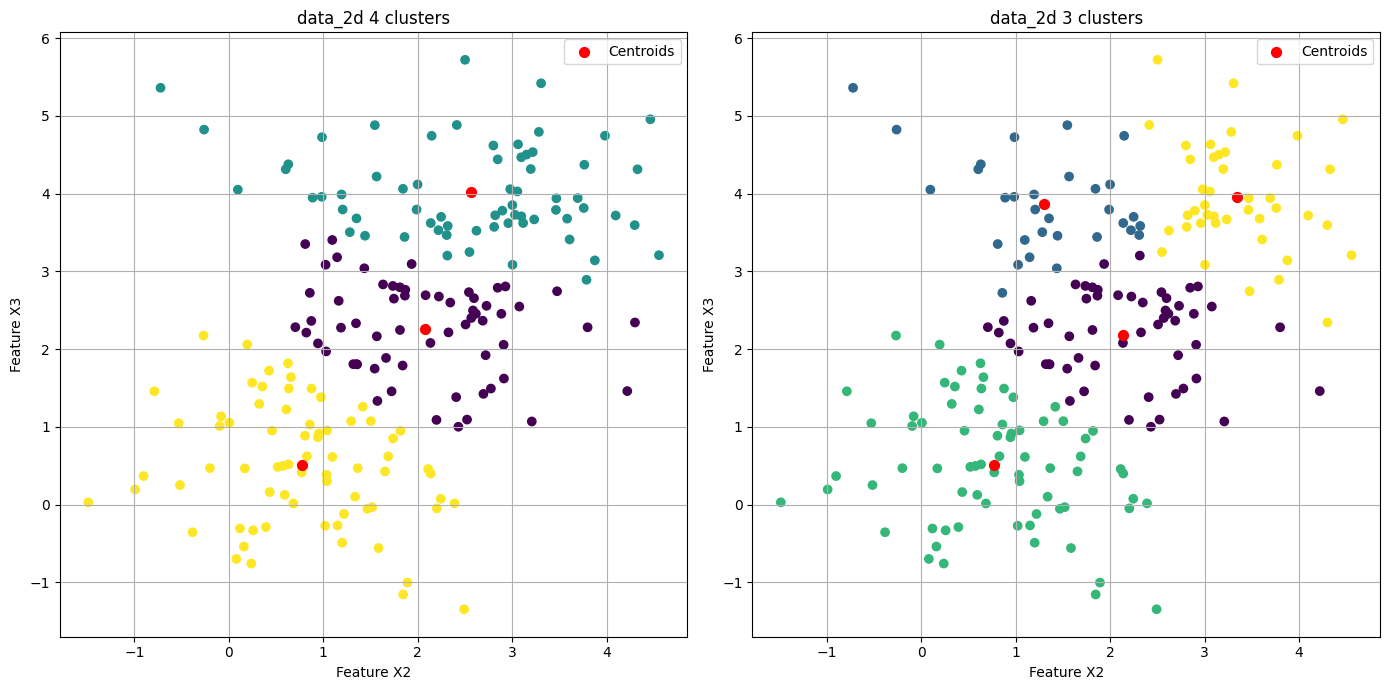

In [83]:
optimal_clusters_3 = 3
kmeans_3 = KMeans(
    n_clusters=optimal_clusters_3, init="k-means++", n_init="auto", random_state=42
)
clusters_3 = kmeans_3.fit_predict(X_2d)

optimal_clusters_4 = 4
kmeans_4 = KMeans(
    n_clusters=optimal_clusters_4, init="k-means++", n_init="auto", random_state=42
)
clusters_4 = kmeans_4.fit_predict(X_2d)


cluster_sizes_3 = pd.Series(clusters_3).value_counts().sort_index()
cluster_sizes_4 = pd.Series(clusters_4).value_counts().sort_index()

print("Cluster sizes for 3 clusters:")
print(cluster_sizes_3)
print("Cluster sizes for 4 clusters:")
print(cluster_sizes_4)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(X_2d.values[:, 0], X_2d.values[:, 1], c=clusters_3, cmap="viridis")
plt.scatter(
    kmeans_3.cluster_centers_[:, 0],
    kmeans_3.cluster_centers_[:, 1],
    s=50,
    c="red",
    label="Centroids",
)
plt.xlabel("Feature X2")
plt.ylabel("Feature X3")
plt.title("data_2d 4 сlusters")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_2d.values[:, 0], X_2d.values[:, 1], c=clusters_4, cmap="viridis")
plt.scatter(
    kmeans_4.cluster_centers_[:, 0],
    kmeans_4.cluster_centers_[:, 1],
    s=50,
    c="red",
    label="Centroids",
)
plt.xlabel("Feature X2")
plt.ylabel("Feature X3")
plt.title("data_2d 3 сlusters")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## ВИСНОВОК     

    Розділення даних на 3 кластери вигладає доцільнішим, оскільки кластери більш рівномірно розділені за розміром. При розділенні на 4 кластери поділ менш рівномірний, а значення Loss скорочується відносно несуттєво (з 267.5427359832115 до 199.5713290667057)

***
## <span style="color:blue">датасет MNIST:</span>
***

1. Завантаження та попередній аналіз структури датасету:

In [84]:
df_mnist = pd.read_csv("sources/mnist.csv")
df_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 3.0 MB


In [85]:
display(df_mnist)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. Відокремлюємо мітки від ознак

In [86]:
labels = df_mnist["7"]
X_mnist = df_mnist.drop(columns=["7"])
display(X_mnist)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


3. Застосування PCA для зменшення розмірності та візуалізація зображення до та після зменшення розмірності

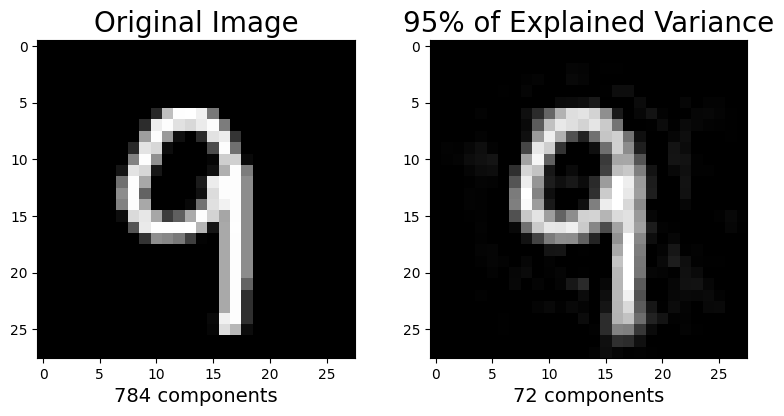

In [87]:
pca = PCA(0.9)
X_mnist_pca = pca.fit_transform(X_mnist)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(
    X_mnist.iloc[495].values.reshape(28, 28),
    cmap=plt.cm.gray,
    interpolation="nearest",
    clim=(0, 255),
)
plt.xlabel(f"784 components", fontsize=14)
plt.title("Original Image", fontsize=20)

pca_reconstructed = pca.inverse_transform(X_mnist_pca)
plt.subplot(1, 2, 2)
plt.imshow(pca_reconstructed[495].reshape(28, 28), cmap=plt.cm.gray, interpolation="nearest", clim=(0, 255))
plt.xlabel(f"{pca.n_components_} components", fontsize=14)
plt.title("95% of Explained Variance", fontsize=20)

plt.tight_layout()
plt.show()

4. Код для методу ліктя та кластеризації для даних MNIST

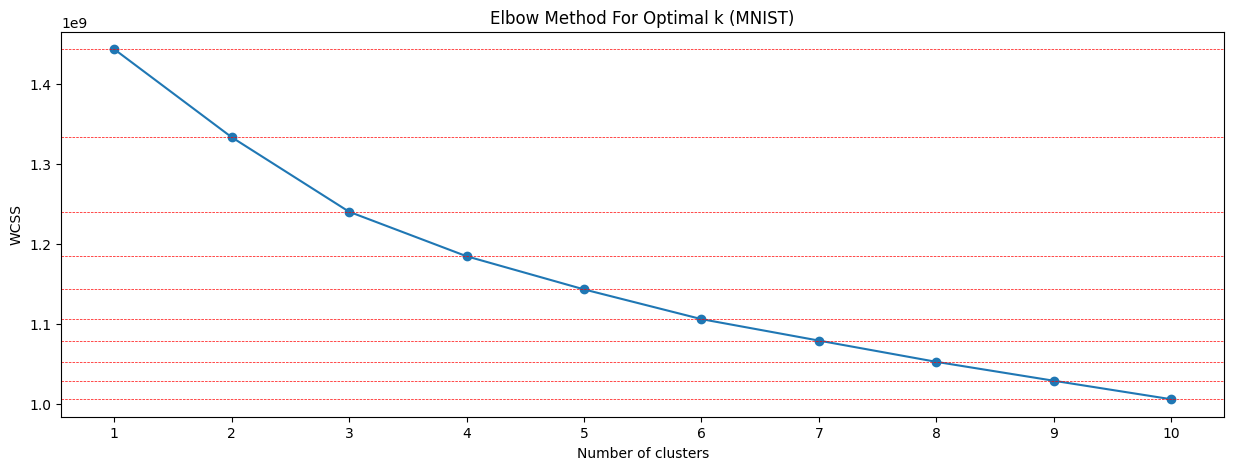

In [88]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42
    )
    kmeans.fit(X_mnist_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="-")
plt.xticks(np.arange(1, 11, step=1))
for loss in wcss:
    plt.axhline(y=loss, color="red", linestyle="--", linewidth=0.5)
plt.title("Elbow Method For Optimal k (MNIST)")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

5. Cтворимо візуалізацію для 3 кластерів

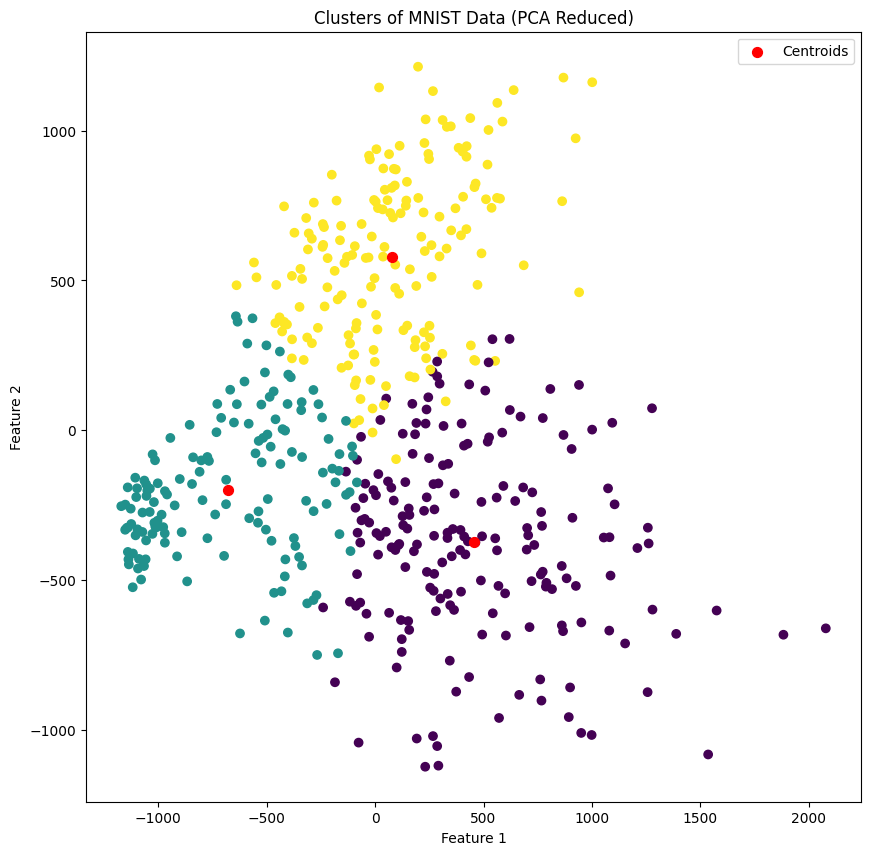

In [89]:
optimal_clusters = 3
kmeans = KMeans(
    n_clusters=optimal_clusters,
    init="k-means++",
    max_iter=300,
    n_init=10,
    random_state=42,
)
clusters = kmeans.fit_predict(X_mnist_pca)


plt.figure(figsize=(10, 10))
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=clusters, cmap="viridis")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=50,
    c="red",
    label="Centroids",
)
plt.title("Clusters of MNIST Data (PCA Reduced)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## <span style="color:green">ВИСНОВКИ:</span>  

Метод ліктя допомагає визначити оптимальну кількість кластерів для даних.   
K-means ефективно розділяє дані на кластери і дозволяє візуально оцінити результати.    
PCA ефективно зменшує розмірність даних без суттєвої втрати варіації, що дозволяє прискорити обробку даних та візуалізацію.